   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


C:\Users\MSI-GF65\PycharmProjects\MLFinal\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
525 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MSI-GF65\PycharmProjects\MLFinal\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MSI-GF65\PycharmProjects\MLFinal\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MSI-GF65\PycharmProjects\MLFina

ประสิทธิภาพของ Logistic Regression (หลังการจูน):
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

ความแม่นยำ: 0.8524590163934426
พารามิเตอร์ที่ดีที่สุด: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

ประสิทธิภาพของ Random Forest (หลังการจูน):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

ความแม่นยำ: 0.8688524590163934
พารามิเตอร์ที่ดีที่สุด: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samp

C:\Users\MSI-GF65\AppData\Local\Temp\ipykernel_12592\2217230906.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=model_scores, palette='viridis')


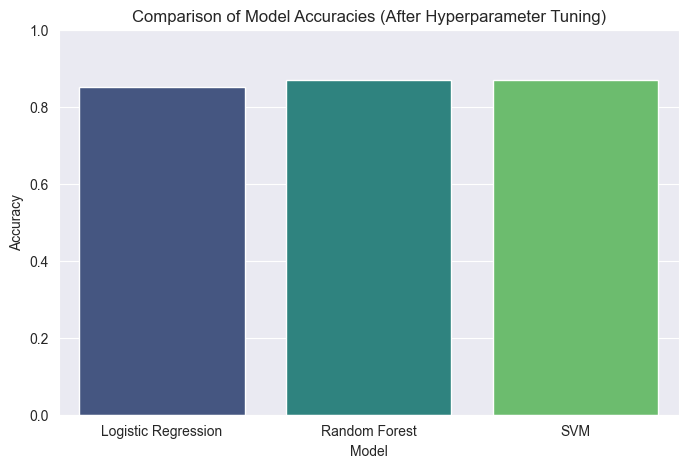

In [8]:
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# โหลดชุดข้อมูล
data = pd.read_csv('data/heart.csv')

# แสดงตัวอย่างชุดข้อมูล
print(data.head())

# การเตรียมข้อมูล
# แยกคุณลักษณะและตัวแปรเป้าหมาย
X = data.drop('output', axis=1)  
y = data['output']

# แบ่งชุดข้อมูลออกเป็นชุดการฝึกและชุดการทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ทำการมาตรฐานข้อมูล (สำคัญสำหรับอัลกอริธึมเช่น SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# สร้าง Grid สำหรับ Logistic Regression
log_reg_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1.0, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# สร้าง Grid สำหรับ Random Forest
random_forest_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# สร้าง Grid สำหรับ SVM
svm_grid = {
    'C': [0.01, 0.1, 1.0, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'max_iter': [-1, 1000, 5000]
}

# สร้าง GridSearchCV สำหรับแต่ละโมเดล
log_reg_search = GridSearchCV(LogisticRegression(random_state=42), log_reg_grid, cv=5, n_jobs=-1)
random_forest_search = GridSearchCV(RandomForestClassifier(random_state=42), random_forest_grid, cv=5, n_jobs=-1)
svm_search = GridSearchCV(SVC(random_state=42), svm_grid, cv=5, n_jobs=-1)

# ฝึกโมเดลโดยใช้ GridSearchCV
log_reg_search.fit(X_train, y_train)
random_forest_search.fit(X_train, y_train)
svm_search.fit(X_train, y_train)

# ทำการทำนาย
log_reg_pred = log_reg_search.predict(X_test)
random_forest_pred = random_forest_search.predict(X_test)
svm_pred = svm_search.predict(X_test)

# ประเมินผลโมเดล
print("ประสิทธิภาพของ Logistic Regression (หลังการจูน):")
print(classification_report(y_test, log_reg_pred))
print("ความแม่นยำ:", accuracy_score(y_test, log_reg_pred))
print("พารามิเตอร์ที่ดีที่สุด:", log_reg_search.best_params_)

print("\nประสิทธิภาพของ Random Forest (หลังการจูน):")
print(classification_report(y_test, random_forest_pred))
print("ความแม่นยำ:", accuracy_score(y_test, random_forest_pred))
print("พารามิเตอร์ที่ดีที่สุด:", random_forest_search.best_params_)

print("\nประสิทธิภาพของ SVM (หลังการจูน):")
print(classification_report(y_test, svm_pred))
print("ความแม่นยำ:", accuracy_score(y_test, svm_pred))
print("พารามิเตอร์ที่ดีที่สุด:", svm_search.best_params_)

# เลือกโมเดลที่ดีที่สุดตามความแม่นยำ
accuracies = {
    'Logistic Regression': accuracy_score(y_test, log_reg_pred),
    'Random Forest': accuracy_score(y_test, random_forest_pred),
    'SVM': accuracy_score(y_test, svm_pred)
}

best_models = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
print("\n3 อันดับโมเดลที่ดีที่สุด:")
for model, score in best_models:
    print(f"{model}: {score}")
    
# Plot the accuracies
model_names = list(accuracies.keys())
model_scores = list(accuracies.values())

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=model_scores, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies (After Hyperparameter Tuning)')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()


In [9]:
from joblib import dump

# บันทึกโมเดลที่ดีที่สุด (Random Forest) และ scaler
dump(random_forest_search.best_estimator_, 'random_forest_model.joblib')
dump(scaler, 'scaler.joblib')

['scaler.joblib']